# Relazione finale progetto ViZDoom

Autori: Luca Gregori & Alessandro Wood  
Corso: Machine Learning


## Q-Learning ed esperimenti iniziali
Il Reinforcement Learning è uno dei 3 paradigmi di base del Machine Learning (assieme al Supervised e al Unsupervised Learning) e sfrutta le esperienze di un agente per fargli effettuare decisioni ottimali.
Il Reinforcement Learning coinvolge un agente, un insieme S di stati e uno A di azioni per ogni stato; eseguendo un'azione l'agente transiziona da uno stato ad un altro, ottenendo una reward (valore numerico).
L'obiettivo dell'agente è quello di massimizzare la reward ottenuta.
L'algoritmo più semplice che incorpora questo paradigma è il Q-learning, dove l'agente impara tramite le reward fornite dall'ambiente.
Viene definito un Q-value associato ad ogni coppia (stato, azione) che definisce la "qualità" di tale azione nello stato.

$Q(state, action) \leftarrow (1 - \alpha)Q(state, action) + \alpha (reward + \gamma max Q(state, all actions))$

dove $\alpha$ è il learning rate e $\gamma$ il discount factor.
Con questa funzione viene aggiornato il Q-Value dello stato e azioni correnti dell'agente tramite il vecchio valore pesato con $(1 - \alpha)$
sommato alla combinazione della reward derivata dall'azione corrente effettuata nello stato corrente con il valore massimo delle reward future scontato di $\gamma$.
Ogni Q-value viene salvato in una matrice di grandezza $|states| \times |actions|$ chiamata Q-table, inizializzata a 0, tramite cui è possibile scegliere l'azione migliore scegliendo quella con il Q-value corrispondente maggiore.

---

__Taxi driver__

__Scenario:__  
Un taxi deve prendere dei passeggeri e lasciarli ad una postazione predefinita (sia lo spawn che il target dei passeggeri può essere una di 4 zone) su una griglia 5 x 5
su cui sono presenti ostacoli.

__Rewards:__
- Reward positiva grande per aver portato a destinazione un passeggero
- Reward negativa per aver lasciato il passeggero non sul target
- Reward negativa piccola ogni step

__Stati:__
- 5 x 5 (posizioni taxi) x (4 + 1) (posizioni passeggero: 4 zone + stare dentro al taxi) x 4 (zone)

__Azioni:__
- South
- North
- East
- West
- Pickup
- Dropoff


## Deep-Q Learning e reti Double e Dueling
Il Q-learning salva i Q-value in una matrice: questo approccio, all'aumentare del numero di stati/azioni, diventa insostenibile e computazionalmente inefficiente.
A questo scopo, è possibile approssimare i Q-value, in modo tale da applicare questa tecnica a problemi più grandi: come approssimatore di funzione si può usare una rete neurale deep.
Tuttavia in problemi complessi è possibile che rete diverga o oscilli troppo, pertanto viene in tal caso introdotta la variante _Double_ della _DQN_: per la stima dei valori q viene utilizzata una seconda rete (target-net)
i cui pesi vengono aggiornati periodicamente con i pesi della rete che viene addestrata; poichè i target vengono generati utilizzando un insieme "vecchio" di parametri, viene di fatto aggiunto un delay fra il momento in cui
viene aggiornata Q e quello in cui questo aggiornamento ha un effetto sui target, rendendo oscillazioni e divergenze più improbabili.

Definiamo le seguenti:


$Q value:\\
Q^\pi(s, a) = E[R_t | s_t = s, a_t = a, \pi]\\
 \\
State Value:\\
V^\pi(s) = E_{a\sim\pi(s)}[Q^\pi(s,a)]\\
\\
Advantage:\\
A^\pi(s, a) = Q^\pi(s, a) - V^\pi(s)$

dove $Q$ rappresenta il valore di scegliere una determinata azione a in uno stato $s$;
$V$ rappresenta il valore associato allo stato $s$ a prescindere dall'azione effettuata;
$A$ rappresenta quanto sia vantaggioso selezionare un'azione a rispetto alle altre in uno stato $s$.
Un ulteriore variante è la _Dueling DQN_ la quale separa esplicitamente la rappresentazione degli state-value e degli advantage, scelta motivata dal fatto che
in alcuni giochi non è necessario conoscere il valore di ogni azione ad ogni timestep.
Tuttavia questi due stream vanno combinati e Wang propone il modo seguente (che abbiamo deciso di utilizzare):  

$Q(s,a) = V(s) + (A(s,a) - \frac{1}{|A|} \sum_{a'} A(s, a)$

Poi è possibile scegliere l'azione migliore effettuando un $argmax(a)$ di $Q$.


Queste due varianti possono essere combinate in una _Double Dueling DQN_.


## Specifiche Hardware:

PC:
- CPU: Intel Core i7-5930k (6 core, 12 Thread), RAM: 16GB DDR4, GPU: NVIDIA 1080 8GB DDR6 VRAM

Cloud Based Service:
- Google Colab (con GPU)

Portatili:
- CPU: Intel Core i7-8750H, RAM: 16GB DDR4, GPU: NVIDIA GeForce 1050ti 4GB DDR6 VRAM
- CPU: Intel Core i7-7700HQ, RAM: 16GB DDR4, GPU: NVIDIA GeForce GTX 1060 Max-Q 6GB DDR6 VRAM

## Preparazione dell'ambiente di sviluppo


- Installazione driver Nvidia (proprietari) (prerequisiti per cuda):

```
sudo apt install nvidia-driver-460
```

- Installazione Cuda (versione 11.2):
```
sudo apt install nvidia-cuda-toolkit
```
- Installazione nvidia cuDNN dal seguente [link](https://developer.nvidia.com/rdp/cudnn-download) (richiede registrazione al programma nvidia developer)  
cuDNN Runtime Library for Ubuntu20.04 x86_64 (Deb) è il pacchetto da installare


- Esportazioni variabili d’ambiente:
```
echo 'export LD_LIBRARY_PATH=/usr/lib/cuda/lib64:$LD_LIBRARY_PATH' >> ~/.bashrc
echo 'export LD_LIBRARY_PATH=/usr/lib/cuda/include:$LD_LIBRARY_PATH' >> ~/.bashrc
source ~/.bashrc
```
- Per verificare l’installazione di cuda
```
nvcc -V
```
- Installazione di Tensorflow/PyTorch tramite pip

- Installazione ViZDoom
si segua la guida quick start per python: [VizDoom](https://github.com/mwydmuch/ViZDoom).

# ViZDoom

 ViZdoom è un ambiente che consente lo sviluppo di AI bot che giocano a Doom utilizzando lo schermo come input, avendo come obiettivo principale la ricerca in ambito machine learning e deep reinforcement learning.

Per maggiori informazioni visitare il sito ufficiale dal seguente [link](http://vizdoom.cs.put.edu.pl/).

## Ottimizzazione

Poichè le nostre risorse sono limitate, abbiamo speso del tempo per ottimizzare il training.
In primo luogo abbiamo cambiato framework, passando da Tensorflow a Pytorch, il quale alloca le risorse della GPU in modo più efficiente ( testato empiricamente: tensorflow tendeva ad allocare interamente la VRAM e utilizzava meno risorse di calcolo).
Successivamente abbiamo fatto un refactoring del codice (il codice su cui ci siamo basati era quello fornito dai tutorial di VIZDoom stesso), facendo un utilizzo intensivo di tensori, assegnandoli dinamicamente alla CPU o alla GPU a seconda della tipologia di calcolo da effettuare e con l'obiettivo di dividere le mansioni in modo tale da ottimizzare il trade-off tra i due componenti, limitando il passaggio dei dati da VRAM a RAM (e viceversa), che abbiamo constatato essere un collo di bottiglia.
Il miglioramento risultante è stato abbastanza significativo, sia su Google Colab che in locale.

Provato inoltre XLA (aXceleratated Linear Algebra: tool per la precompilazione del codice) su pytorch ottenendo un miglioramento irrisorio.
Ottimizzazione ulteriore nel salvataggio delle statistiche tramite utilizzo estensivo di tensori allocati sul device utilizzato (generalmente GPU).


## Primo Scenario (Basic)

__Descrizione dello scenario:__

L’agente si trova “spalle al muro” e ha, ad una certa distanza, un altro muro davanti cui spawna un demone (in posizione casuale)

__Azioni consentite:__

- MOVE_LEFT
- MOVE_RIGHT
- ATTACK

(ammesse anche loro combinazioni)

__Reward__:

- -1 per tic;
- -5 per colpo sparato;
- +106 per uccisione.

- (chiaramente lo spazio delle reward non è sparso!)

__Obiettivo:__

- Colpire una volta il bersaglio per terminare lo scenario

- Durata massima scenario: 300 tic

---

__Architettura Rete:__

Architettura vecchia, ispirata dai ragazzi di Stanford.
```
conv1: 32 filtri, kernel 7x7, stride 1 , ReLU
conv2: 32 filtri, 5x5 kernel, stride 1, ReLU
fc : 1024 nodi
state_fc : 512 nodi
advantage_fc2: 512 nodi
output_state_value: 1 nodo
output_q_values: 1 nodo x ogni azione
```

Architettura nuova, ispirata dal paper di DeepMind, con la differenza che manca un ultimo strato convoluzionale.
```
conv1: 32 filtri, kernel 8x8, stride 4, ReLU
conv2: 64 filtri, kernel 4x4, stride 1, ReLU
state_fc : 512 nodi
advantage_fc: 512 nodi
output_state_value: 1 nodo
output_q_values: 1 nodo x ogni azione
```

Ottimizzatore: SGD


L'architettura vecchia otteneva risultati leggermente peggiori, ma a fronte di un tempo di addestramento esagerato, per via dello strato fully connected aggiuntivo da 1024 nodi.

__Tipologia Rete:__

- Dueling DQN
- Double DQN
- Double Dueling DQN

Gli esperimenti in questione confermano ciò che viene dichiarato in letteratura. Non c'è dunque da sorprendersi, se la
rete _Dueling DQN_ (che non è _Double_) dopo qualche epoca cominci a divergere (si vedano i grafici). Visti i risultati
ottenuti con la rete _Dueling DQN_ si è ritenuto inutile sperimentare una semplice _DQN_.

__Batch size:__

- Batch size 32
- Batch size 64
- Batch size 128

__Frame skip:__

Numero di frame che separano un'azione dell'agente dalla successiva, utile per diminuire la correlazione
tra uno stato e il suo successivo.
- Frame skip 4
- Frame skip 8
- Frame skip 12

La scelta è ricaduta ovviamente per il frame skip pari a 12, come si può notare dai grafici il
miglioramento all'aumentare del valore di skip è decisivo.

__Experience Replay Memory Size__:

Buffer (gestito come una coda) in cui sono memorizzati gli ultimi n stati, da cui vengono estratti dei samples di dimensione pari al batch size.

- Replay Memory 5k
- Replay Memory 10k
- Replay Memory 50k
- Replay Memory 100k:  
Si è effettuato un tentativo, non riuscendo alla fine a terminare l'addestramento, poiché la memoria
dopo qualche epoca veniva completamente occupata.

Al termine degli esperimenti si è scelto di utilizzare una Replay Memory di 10k,
visto gli ottimi risultati rispetto a quella di 5k e all'inefficienza degli altri (in termini di memoria).

__Target Net Update__:

Indica ogni quanti step aggiornare la rete target.

- Target Net Update 1000
- Target Net Update 3000
- Target Net Update 10000

A fronte di un tempo di convergenza leggermente maggiore, si è scelto di optare per un target net update pari 10000, poiché l'agente in fase di test raggiunge valori di reward più elevati, anche se con più oscillazioni (si vedano i grafici).

__Epsilon:__

Parametro utilizzato nell'esplorazione epsilon-greedy, in particolare negli esperimenti effettuati si è modificato
il valore minimo e non il fattore di decay.

- Epsilon min 0.1
- Epsilon min 0.05

Generalmente un'epsilon minore consente all'agente di affidarsi meno a scelte casuali e ciò può essere un fattore positivo
 dopo la convergenza; basti pensare che un agente perfetto con un epsilon min pari a 0.1 può sbagliare fino al 10% delle volte.
 Pertanto, terminato l'addestramento si può pensare di porre tale valore a 0; tuttavia è importante mantenerla maggiore di 0
  durante il training per l'esplorazione dell'ambiente.
  
 __RGB:__
 
 L'introduzione di un input RGB alla rete non ha portato nessun miglioramento rispetto alla scala di grigi, ma ha aumentato il tempo di addestramento.
 
---
 
__Seguono ora dei grafici riassuntivi degli esperimenti sopraccitati:__

per maggiori informazioni visualizzare il notebook delle statistiche relativo allo scenario in questione.

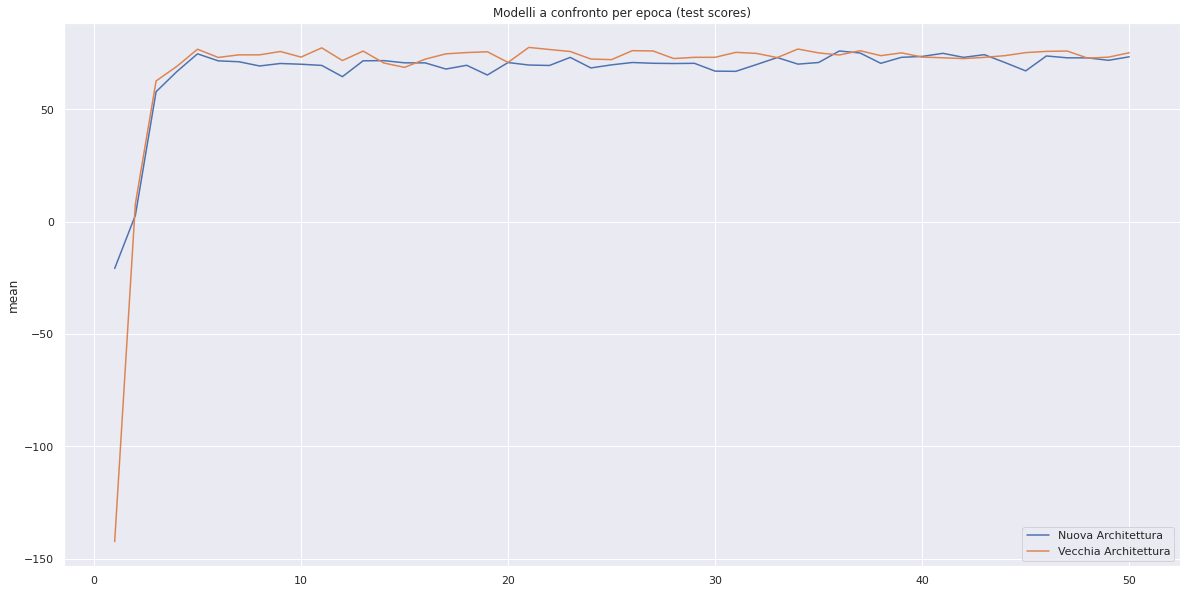

In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

with open("Stats/basic/stats_nuova_architettura.json") as json_file:
    stats_nuova_architettura = json.load(json_file)
with open("Stats/basic/stats_vecchia_architettura.json") as json_file:
    stats_vecchia_architettura = json.load(json_file)
    
data1 = pd.DataFrame(stats_nuova_architettura["test_scores"])
data2 = pd.DataFrame(stats_vecchia_architettura["test_scores"])
plot = sns.lineplot(data=data1, x = range(1, stats_nuova_architettura["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data2, x = range(1, stats_vecchia_architettura["epochs"] + 1), y="mean")
plt.legend(labels=["Nuova Architettura","Vecchia Architettura"])
plt.title('Modelli a confronto per epoca (test scores)')
plt.show()

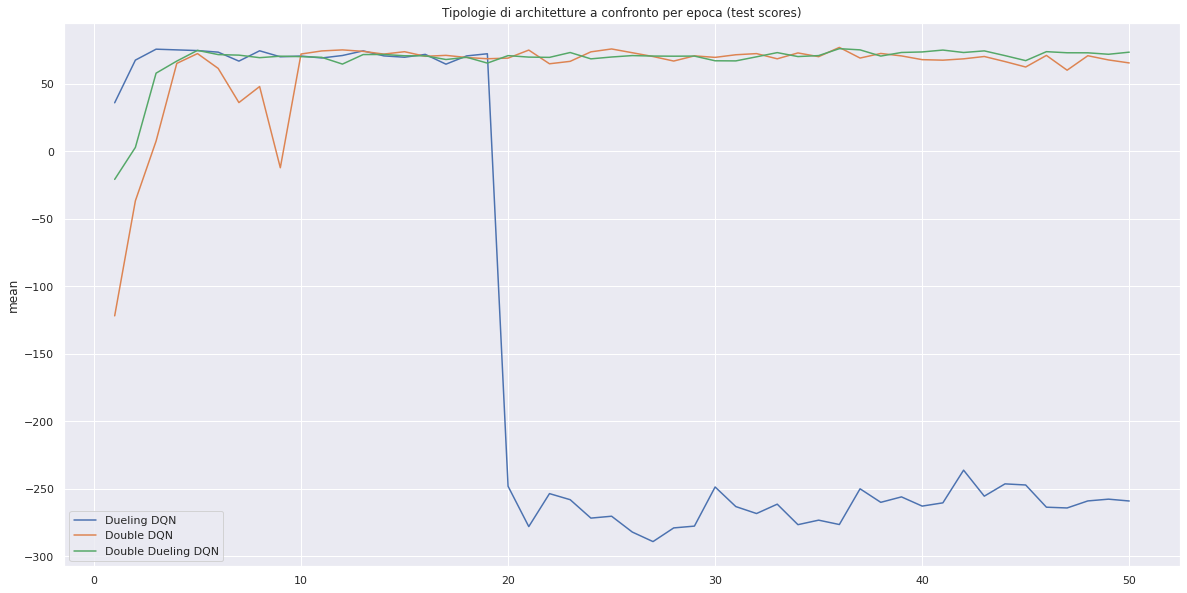

In [2]:
with open("Stats/basic/stats_dqn_no_double_ma_dueling.json") as json_file:
    stats_dqn_no_double_ma_dueling = json.load(json_file)
with open("Stats/basic/stats_dqn_no_dueling_ma_double.json") as json_file:
    stats_dqn_no_dueling_ma_double = json.load(json_file)

data1 = pd.DataFrame(stats_dqn_no_double_ma_dueling["test_scores"])
data2 = pd.DataFrame(stats_dqn_no_dueling_ma_double["test_scores"])
data3 = pd.DataFrame(stats_nuova_architettura["test_scores"])
plot = sns.lineplot(data=data1, x = range(1, stats_nuova_architettura["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data2, x = range(1, stats_vecchia_architettura["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data3, x = range(1, stats_nuova_architettura["epochs"] + 1), y="mean")
plt.legend(labels=["Dueling DQN","Double DQN","Double Dueling DQN"])
plt.title('Tipologie di architetture a confronto per epoca (test scores)')
plt.show()

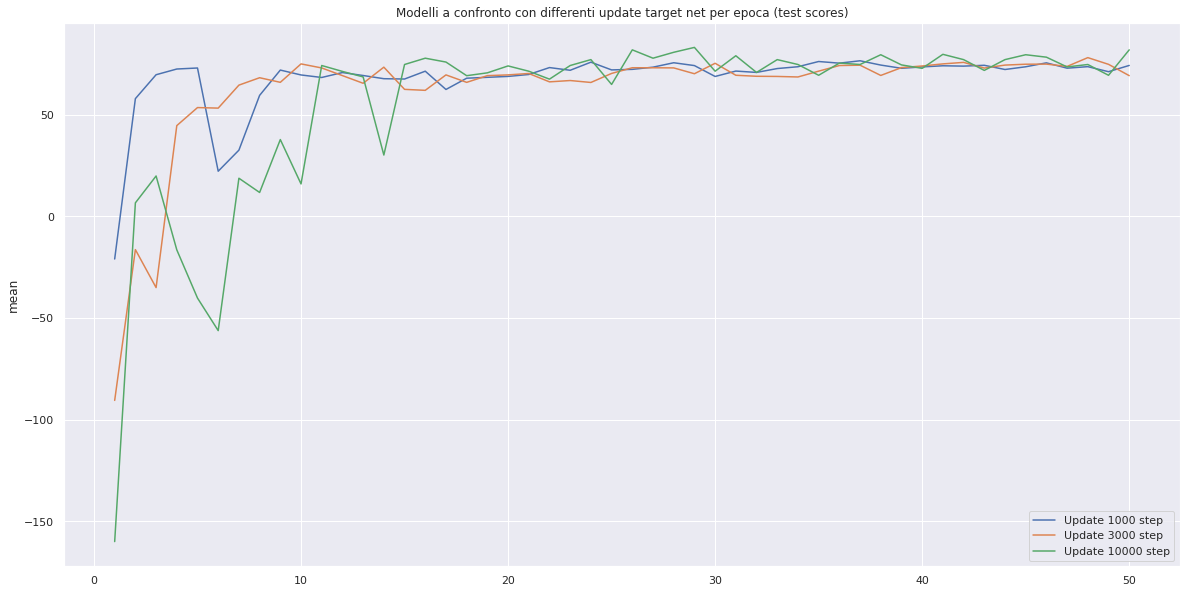

In [3]:
with open("Stats/basic/stats_update_1000step.json") as json_file:
    stats_update_1000step = json.load(json_file)
with open("Stats/basic/stats_update_3000step.json") as json_file:
    stats_update_3000step = json.load(json_file)
with open("Stats/basic/stats_update_10000step.json") as json_file:
    stats_update_10000step = json.load(json_file)

data1 = pd.DataFrame(stats_update_1000step["test_scores"])
data2 = pd.DataFrame(stats_update_3000step["test_scores"])
data3 = pd.DataFrame(stats_update_10000step["test_scores"])
plot = sns.lineplot(data=data1, x = range(1, stats_nuova_architettura["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data2, x = range(1, stats_vecchia_architettura["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data3, x = range(1, stats_vecchia_architettura["epochs"] + 1), y="mean")
plt.legend(labels=["Update 1000 step","Update 3000 step","Update 10000 step"])
plt.title('Modelli a confronto con differenti update target net per epoca (test scores)')
plt.show()

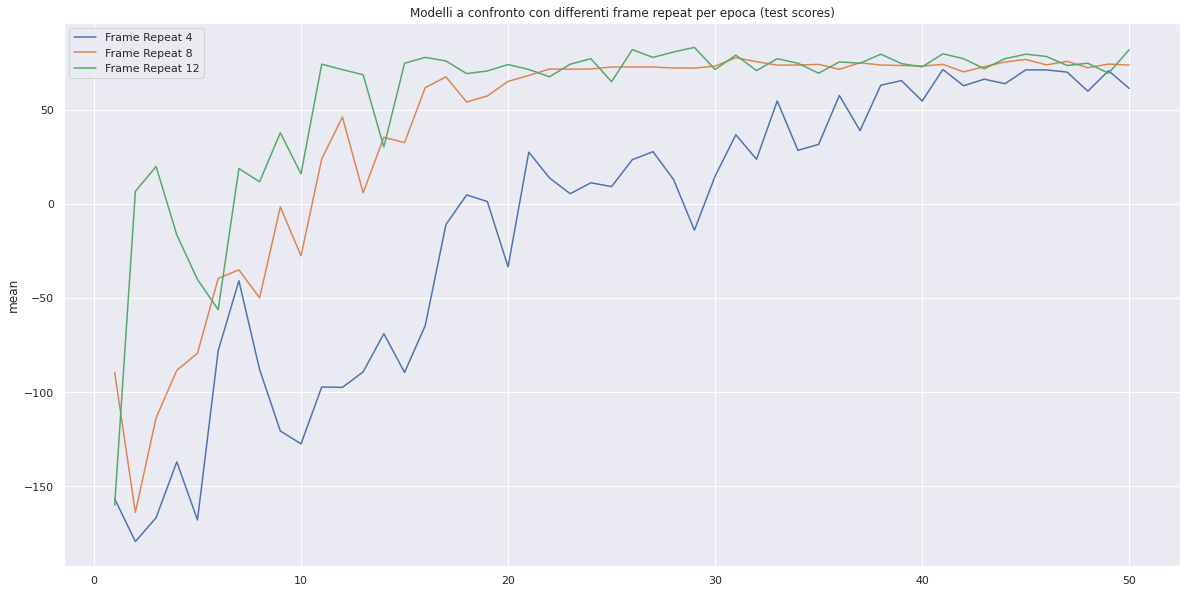

In [4]:
with open("Stats/basic/stats_frame_repeat_4.json") as json_file:
    stats_frame_repeat_4 = json.load(json_file)
with open("Stats/basic/stats_frame_repeat_8.json") as json_file:
    stats_frame_repeat_8 = json.load(json_file)
with open("Stats/basic/stats_update_10000step.json") as json_file:
    stats_frame_repeat_12 = json.load(json_file)
    
data1 = pd.DataFrame(stats_frame_repeat_4["test_scores"])
data2 = pd.DataFrame(stats_frame_repeat_8["test_scores"])
data3 = pd.DataFrame(stats_frame_repeat_12["test_scores"])
plot = sns.lineplot(data=data1, x = range(1, stats_nuova_architettura["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data2, x = range(1, stats_vecchia_architettura["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data3, x = range(1, stats_vecchia_architettura["epochs"] + 1), y="mean")
plt.legend(labels=["Frame Repeat 4","Frame Repeat 8","Frame Repeat 12"])
plt.title('Modelli a confronto con differenti frame repeat per epoca (test scores)')
plt.show()

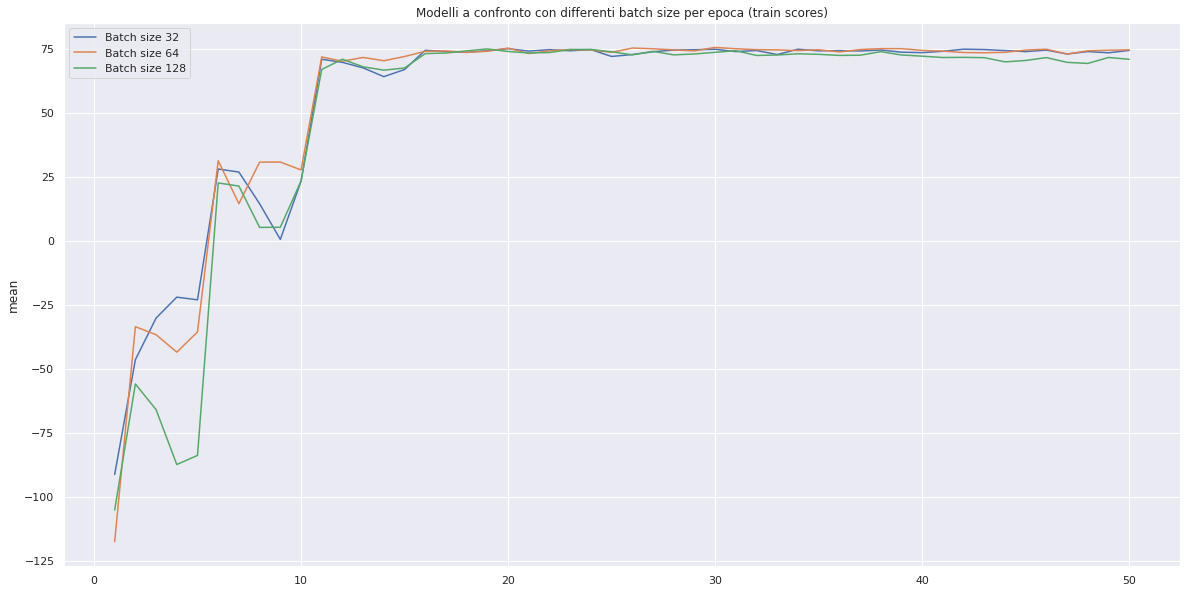

In [5]:
with open("Stats/basic/stats_batch_size_32.json") as json_file:
    stats_batch_size_32 = json.load(json_file)
with open("Stats/basic/stats_update_10000step.json") as json_file:
    stats_batch_size_64 = json.load(json_file)
with open("Stats/basic/stats_batch_size_128.json") as json_file:
    stats_batch_size_128 = json.load(json_file)
    
data1 = pd.DataFrame(stats_batch_size_32["train_scores"])
data2 = pd.DataFrame(stats_batch_size_64["train_scores"])
data3 = pd.DataFrame(stats_batch_size_128["train_scores"])
plot = sns.lineplot(data=data1, x = range(1, stats_nuova_architettura["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data2, x = range(1, stats_vecchia_architettura["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data3, x = range(1, stats_vecchia_architettura["epochs"] + 1), y="mean")
plt.legend(labels=["Batch size 32","Batch size 64","Batch size 128"])
plt.title('Modelli a confronto con differenti batch size per epoca (train scores)')
plt.show()

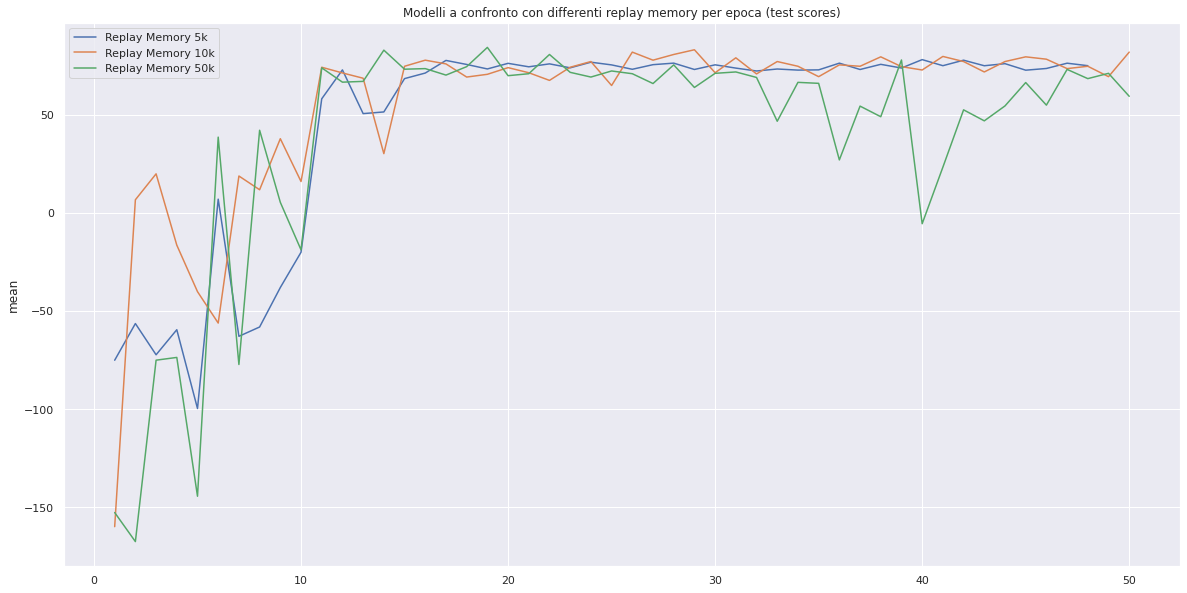

In [6]:
with open("Stats/basic/stats_replay_size_5k.json") as json_file:
    stats_replay_size_5k = json.load(json_file)
with open("Stats/basic/stats_update_10000step.json") as json_file:
    stats_replay_size_10k = json.load(json_file)
with open("Stats/basic/stats_replay_size_50k.json") as json_file:
    stats_replay_size_50k = json.load(json_file)
    
data1 = pd.DataFrame(stats_replay_size_5k["test_scores"])
data2 = pd.DataFrame(stats_replay_size_10k["test_scores"])
data3 = pd.DataFrame(stats_replay_size_50k["test_scores"])
plot = sns.lineplot(data=data1, x = range(1, stats_replay_size_5k["epochs"] + 1 ), y="mean")
plot = sns.lineplot(data=data2, x = range(1, stats_replay_size_10k["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data3, x = range(1, stats_replay_size_50k["epochs"] + 1), y="mean")
plt.legend(labels=["Replay Memory 5k","Replay Memory 10k","Replay Memory 50k"])
plt.title('Modelli a confronto con differenti replay memory per epoca (test scores)')
plt.show()

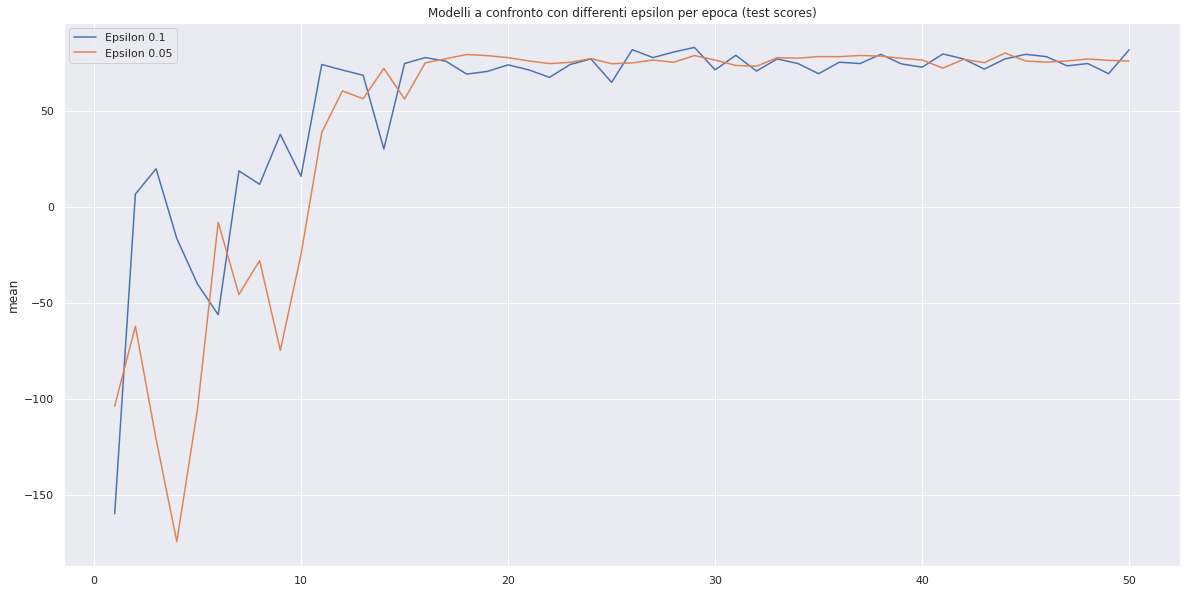

In [7]:
with open("Stats/basic/stats_update_10000step.json") as json_file:
    stats_miglior_modello = json.load(json_file)
with open("Stats/basic/stats-eps-min-005.json") as json_file:
    stats_eps = json.load(json_file)
    
data1 = pd.DataFrame(stats_miglior_modello["test_scores"])
data2 = pd.DataFrame(stats_eps["test_scores"])
plot = sns.lineplot(data=data1, x = range(1, stats_miglior_modello["epochs"]+1), y="mean")
plot = sns.lineplot(data=data2, x = range(1, stats_eps["epochs"] + 1), y="mean")
plt.legend(labels=["Epsilon 0.1","Epsilon 0.05"])
plt.title('Modelli a confronto con differenti epsilon per epoca (test scores)')
plt.show()

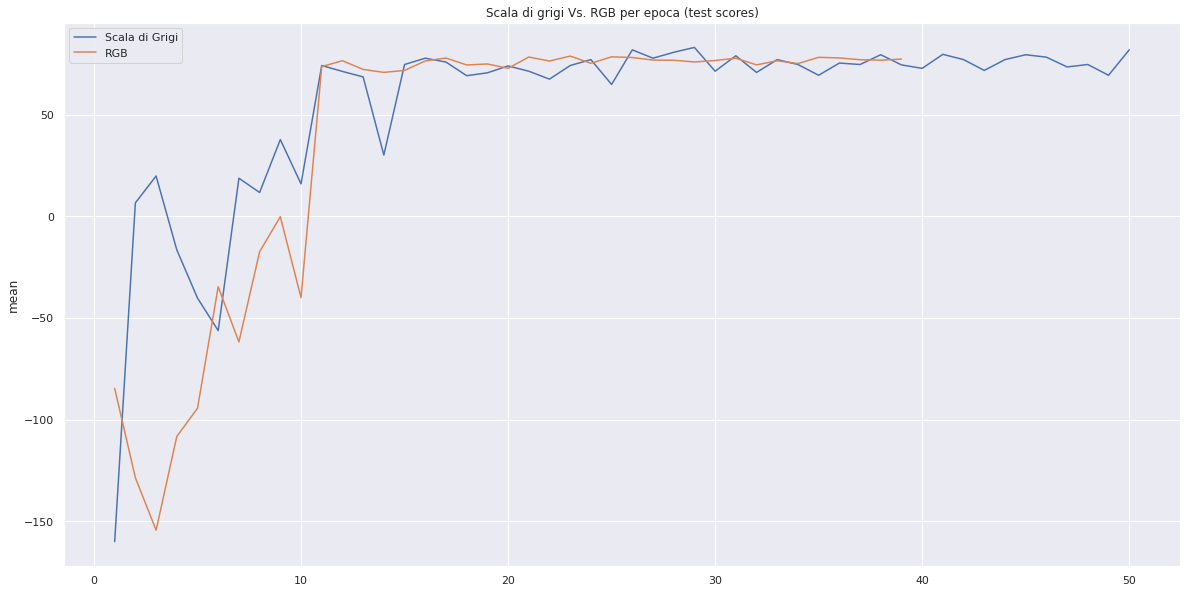

In [8]:
with open("Stats/basic/stats_update_10000step.json") as json_file:
    stats_scala_grigi = json.load(json_file)
with open("Stats/basic/stats-rgb.json") as json_file:
    stats_rgb = json.load(json_file)
    
data1 = pd.DataFrame(stats_scala_grigi["test_scores"])
data2 = pd.DataFrame(stats_rgb["test_scores"])
plot = sns.lineplot(data=data1, x = range(1, stats_scala_grigi["epochs"]+1), y="mean")
plot = sns.lineplot(data=data2, x = range(1, stats_rgb["epochs"] + 1), y="mean")
plt.legend(labels=["Scala di Grigi","RGB"])
plt.title('Scala di grigi Vs. RGB per epoca (test scores)')
plt.show()

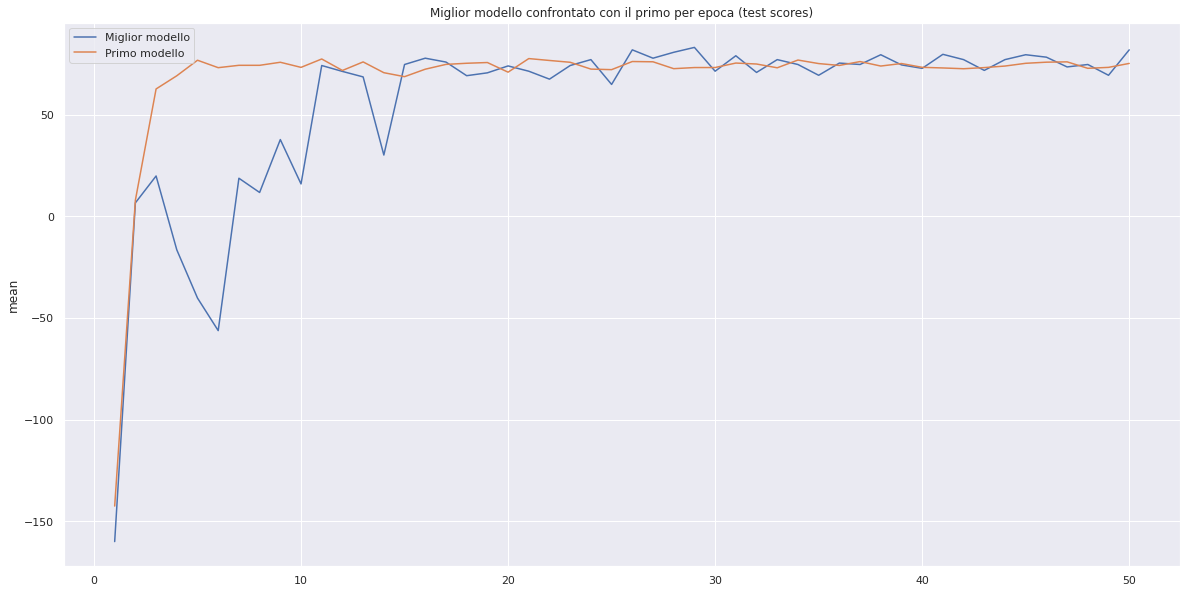

In [9]:
with open("Stats/basic/stats_update_10000step.json") as json_file:
    stats_miglior_modello = json.load(json_file)
with open("Stats/basic/stats_vecchia_architettura.json") as json_file:
    stats_primo_modello = json.load(json_file)
    
data1 = pd.DataFrame(stats_miglior_modello["test_scores"])
data2 = pd.DataFrame(stats_primo_modello["test_scores"])
plot = sns.lineplot(data=data1, x = range(1, stats_miglior_modello["epochs"]+1), y="mean")
plot = sns.lineplot(data=data2, x = range(1, stats_primo_modello["epochs"] + 1), y="mean")
plt.legend(labels=["Miglior modello","Primo modello"])
plt.title('Miglior modello confrontato con il primo per epoca (test scores)')
plt.show()

## Secondo scenario (Health Gathering)


__Descrizione dello scenario:__

L'agente si trova in una mappa quadrata il cui pavimento è costituito da veleno/lava, perde 8 punti salute periodicamente ma spawnano medikit che lo curano di 20 punti saluti.

__Azioni consentite:__

- TURN_LEFT
- TURN_RIGHT
- MOVE_FORWARD

(ammesse anche loro combinazioni)

__Reward__:

- +1 per tic.

(chiaramente lo spazio delle reward è sparso, anzi è costante!)

__Obiettivo:__

- Sopravvivere più a lungo possibile
- Durata massima scenario: 2100 tic (se l’agente sopravvive quasi sempre 2100 si può supporre abbia imparato a sopravvivere indefinitamente)

---

__Problematiche incontrate:__

la reward dello scenario è costante, non cumulativa e dunque poco significativa, tuttavia utile esclusivamente come metrica di valutazione del nostro modello.
Nel primissimo tentativo si è cercato di utilizzare il modello del primo scenario senza apportare alcuna modifica.
Si è osservato un problema di vanishing gradient che è stato risolto utilizzando come ottimizzatore Adam invece che SGD.
Contemporaneamente, è stato fatto un reward shaping con l'intento di creare uno spazio delle reward non costante e non sparso.
Nel dettaglio quel che è stato realizzato è una reward calcolata nel seguente modo:
```
reward = dist + health_reward
```
dove _dist_ è la distanza euclidea dell'agente calcolata rispetto la posizione attuale e quella del frame precedente,
mentre health_reward è la parte di reward relativa alla raccolta di un medkit.
Per raggiungere tale scopo è stato utilizzato il software Slade e il compilatore ACS _acc_, per esporre le variabili relative alla posizione, utili per il calcolo della distanza.

Inoltre, tra gli esperimenti falliti si è adoperato una reward shaping in cui si cumulava ad ogni frame il valore del tic. Ciò è stato fatto prima della reward shaping descritta precedentemente.

__Conclusioni:__

Inizialmente il modello non convergeva, poi con le modifiche descritte sopra si è arrivati ad un punteggio massimo e costante di 2100 per ogni episodio.
Visto che si è ottenuta la perfezione, si è ritenuto inutile utilizzare l’approccio spectator pre-training, la cui idea era nata appunto per la paura nei confronti del secondo scenario. Infine, notare (dal grafico), come il modello finale converga in sole 10 epoche.

---

__Seguono ora dei grafici riassuntivi degli esperimenti sopraccitati:__

per maggiori informazioni visualizzare il notebook delle statistiche relativo allo scenario in questione.

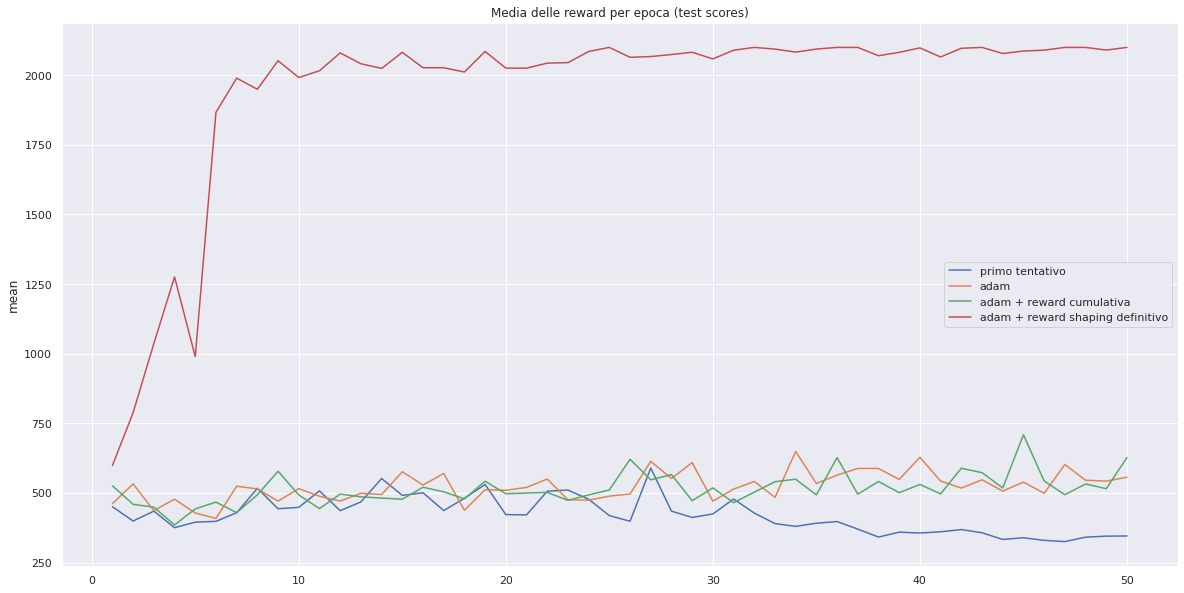

In [10]:
with open("Stats/health-gathering/health-gathering-primo-tentativo.json") as json_file:
    health_primo_tentativo = json.load(json_file)
with open("Stats/health-gathering/health-gathering-con-adam.json") as json_file:
    health_con_adam = json.load(json_file)
with open("Stats/health-gathering/health-gathering-con-adam-e-reward-shaping-semplice.json") as json_file:
    health_con_adam_e_reward_shaping_semplice = json.load(json_file)
with open("Stats/health-gathering/health-gathering-finale.json") as json_file:
    health_finale = json.load(json_file)

data1 = pd.DataFrame(health_primo_tentativo["test_scores"])
data2 = pd.DataFrame(health_con_adam["test_scores"])
data3 = pd.DataFrame(health_con_adam_e_reward_shaping_semplice["test_scores"])
data4 = pd.DataFrame(health_finale["test_scores"])
plot = sns.lineplot(data=data1, x = range(1, health_primo_tentativo["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data2, x = range(1, health_primo_tentativo["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data3, x = range(1, health_primo_tentativo["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data4, x = range(1, health_primo_tentativo["epochs"] + 1), y="mean")
plot = plt.legend(labels=["primo tentativo","adam", "adam + reward cumulativa", "adam + reward shaping definitivo"])
plot = plt.title('Media delle reward per epoca (test scores)')

## Terzo scenario (Health Gathering Supreme)

__Descrizione dello scenario:__

Simile al secondo scenario (Health Gathering) ma in un labirinto e con delle fiale di veleno che tolgono 30 punti salute se raccolte. Esattamente come i medikit anche le fiale di veleno spawnano in punti casuali della mappa.

__Azioni consentite:__

- TURN_LEFT
- TURN_RIGHT
- MOVE_FORWARD

(ammesse anche loro combinazioni)

__Reward__:

- +1 per tic

(chiaramente lo spazio delle reward è sparso, anzi è costante!)

__Obiettivo:__

- Sopravvivere più a lungo possibile
- Durata massima scenario: 2100 tic (se l’agente sopravvive quasi sempre 2100 si può supporre abbia imparato a sopravvivere indefinitamente)

---

__Problematiche incontrate:__

Si è in primo luogo tentanto di effettuare transfer learning dal modello addestrato sul secondo scenario, visto il task molto simile.
Con il transfer learning, l'agente otteneva migliori risultati da subito, ignorando però il veleno.
Inoltre vista la presenza di più muri, con textures diverse rispetto al primo scenario, l'agente si è molto spesso trovato spaesato
e non in grado di navigare la mappa senza rimanere bloccato in qualche vicolo o angolo.
Viste le problematiche si scelto di abbandonare la strada del transfer learning, anche perché il lavoro fatto in seguito
avrebbe previsto uno stravolgimento del modello della reward e reso tale approccio superfluo.

Nei primi esperimenti si è cercato di creare una nuova reward shaping tenendo in considerazione anche le fiale di veleno, visto il diverso scenario. Come fatto in precedenza, per raggiungere tale scopo si è messa
mano nuovamente allo scenario grazie al programma Slade e il suo compilatore.

Si è giunti infine alla seguente reward:
```python
reward = c1 * distance + c2 * health_reward + c3 * poison_reward (che è negativa)
# dove c1, c2, c3 sono dei coefficienti numerici.
```
Nonostante si è pensato di tenere conto anche del veleno, questa nuova reward shaping, non ha portato ai risultati sperati.
Sono stati fatti anche dei tentativi per variare i coefficienti delle reward dei medikit e del veleno in modo tale che fossero inversamente proporzionali ai punti salute che l’agente aveva al momento della raccolta.
Anche questo approccio non ha avuto tornaconti evidenti.

A questo punto sorgono dei dubbi: il reward shaping non è stato bilanciato correttamente?
Il modello _DQN_ aveva dei limiti strutturali in questo scenario?

Per rispondere a tali domande si è proceduto ad ulteriori esperimenti che hanno visto in primo luogo l'introduzione
dell'approccio _Rarity of Events_ e in secondo luogo la modifica del modello.

__Rarity of Events:__

Un approccio differente nell'effettuare Reward Shaping è il Rarity of Events, che associa ad ogni evento (per ogni episodio) la sua occorrenza media.
Nel caso di _Health Gathering Supreme_ abbiamo scelto come eventi da monitorare i seguenti:
```python
vettore_eventi = (medikit_reward, poison_reward, distance, velocity)
```
Ogni volta che termina un episodio viene generato un vettore dei valori medi di tutti i vettori eventi che viene salvato in un _Event Buffer_
di dimensione N (nel nostro caso N = 100, i.e. contiene i vettori dell'occorrenza media degli eventi relativi agli ultimi 100 episodi).
Per ogni vettore di eventi associato ad uno specifico stato viene poi calcolata la reward intrinseca in questo modo:

$R_t(x) = \sum_{i=1}^{|x|} x_i \frac{1} {max(\mu_t(\epsilon_i), \tau)}$

dove $\mu_t(\epsilon_i)$ rappresenta la media episodica delle occorrenze dell'evento $\epsilon_i$ al tempo $i$, e $\tau$ è una costante per effettuare
un clipping dei valori (limitando la reward a $\frac{1}{\tau}$). L'agente con l'utilizzo di questa reward intrinseca risulta più "curioso" rispetto ad eventi temporalmente rari.
All'aumentare di N si incrementa tale curiosità, tuttavia per valori troppo grandi l'_Event Buffer_ non si riempie mai e la media episodica delle occorrenze degli eventi risulta contaminata
dagli outlier dovuti agli episodi delle prime epoche.

Tornando al vettore degli eventi: invece che la semplice distanza euclidea calcolata tra la posizione attuale e quella dell'ultimo frame, si ha una
distanza calcolata tra la posizione attuale e quella di 25 stati precedenti. Tale approccio tende a far percorrere una
distanza (in linea d'aria) maggiore all'agente, evitando dunque di girare in cerchio (approccio precedente).
Tuttavia la nuova distanza non basta a disincentivare l'agente a liberarsi da eventuali angoli,
dunque a tale proposito si è introdotta la _velocity_, ottenuta come il modulo del vettore velocità dell'agente nell'attuale frame.

Per dare diversi pesi ai vari eventi si moltiplica per un coefficiente ciascun evento,
ma solo al momento del calcolo della reward intrinseca e non quando si registra l'evento nell'_Event Buffer_.

__Modifica del modello:__

Si è aggiunto un ulteriore strato convoluzionale, ed è bastato questo per ottenere dei risultati decisamente migliori.
Forse gli scarsi risultati ottenuti precedentemente erano dovuti al semplice fatto che l'agente non era in grado di distinguere
la fiala di veleno e il medkit se entrambi presenti a schermo. Con questa aggiunta si è dunque deciso di abbandonare quella piccola semplificazione
introdotta al momento della scelta della nuova architettura nel primo scenario. In particolare, si è sperimentata l'architettura con lo strato in più prima con 32 filtri poi con 64.

---

__Seguono ora dei grafici riassuntivi degli esperimenti sopraccitati:__

per maggiori informazioni visualizzare il notebook delle statistiche relativo allo scenario in questione.


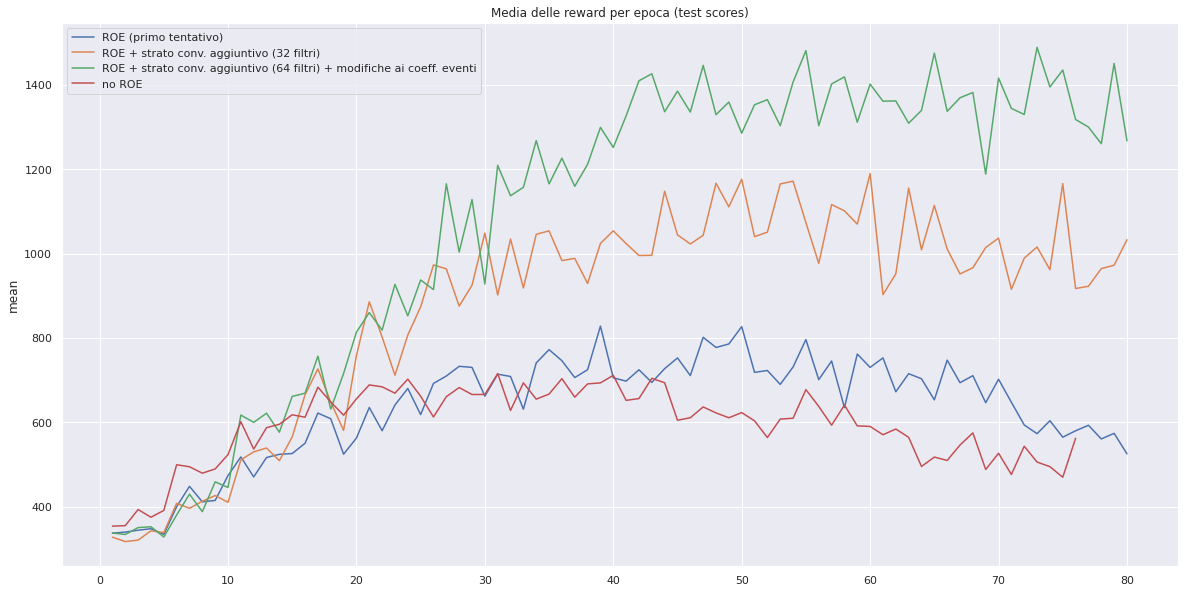

In [11]:
''' Tentativo senza ROE '''
with open("Stats/health-gathering-supreme/health-supreme-pessimo2.json") as json_file:
    health_gathering_supreme5 = json.load(json_file)


''' ROE '''
with open("Stats/health-gathering-supreme/health-supreme-secondo-tentativoROE.json") as json_file:
    health_gathering_supreme2 = json.load(json_file)
with open("Stats/health-gathering-supreme/health-supreme-tentativo-con-strato-inpiu(32filtri).json") as json_file:
    health_gathering_supreme3 = json.load(json_file)
with open("Stats/health-gathering-supreme/health-supreme-finale.json") as json_file:
    health_gathering_supreme4 = json.load(json_file)

data2 = pd.DataFrame(health_gathering_supreme2["test_scores"])
data3 = pd.DataFrame(health_gathering_supreme3["test_scores"])
data4 = pd.DataFrame(health_gathering_supreme4["test_scores"])

data5 = pd.DataFrame(health_gathering_supreme5["test_scores"])

plot = sns.lineplot(data=data2, x = range(1, health_gathering_supreme2["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data3, x = range(1, health_gathering_supreme3["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data4, x = range(1, health_gathering_supreme4["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data5, x = range(1, health_gathering_supreme5["epochs"] + 1), y="mean")
plt.legend(labels=["ROE (primo tentativo)","ROE + strato conv. aggiuntivo (32 filtri)", "ROE + strato conv. aggiuntivo (64 filtri) + modifiche ai coeff. eventi","no ROE"])
plt.title('Media delle reward per epoca (test scores)')
plt.show()


#### Seguono ora dei grafici relativi alle statistiche degli eventi relative al miglior modello per lo scenario in questione
Vista l'introduzione del _Rarity of Events_ si è pensato di modificare il codice affinché si potesse analizare il vettore degli eventi medio e la reward intrinsica per ciascun epoca. Ovviamente tutte le statistiche che seguiranno sono state raccolte nella fase di training.

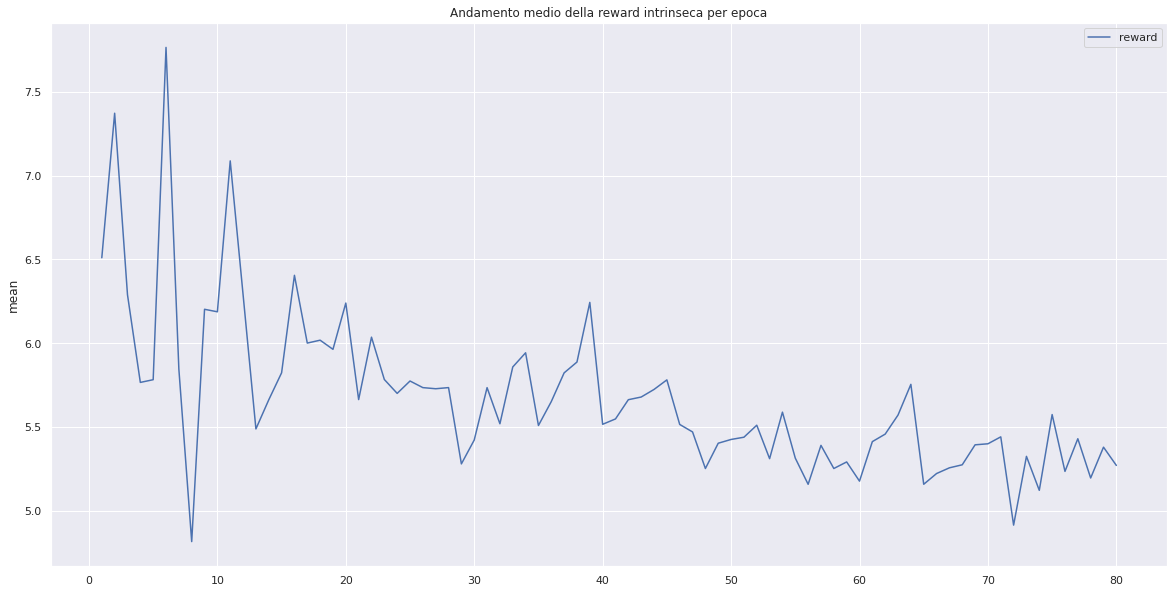

In [12]:
with open("Stats/health-gathering-supreme/health-supreme-eventi.json") as json_file:
    stats_event = json.load(json_file)

reward = pd.DataFrame(stats_event["reward"])
medkit_pickup = pd.DataFrame(stats_event["medkit_pickup"])
poison_pickup = pd.DataFrame(stats_event["poison_pickup"])
health = pd.DataFrame(stats_event["health"])
distance = pd.DataFrame(stats_event["distance"])
velocity = pd.DataFrame(stats_event["velocity"])
done = pd.DataFrame(stats_event["done"])

plot = sns.lineplot(data=reward, x = range(1,len(medkit_pickup) + 1), y="mean")
plt.legend(labels=["reward"])
plt.title('Andamento medio della reward intrinseca per epoca')
plt.show()

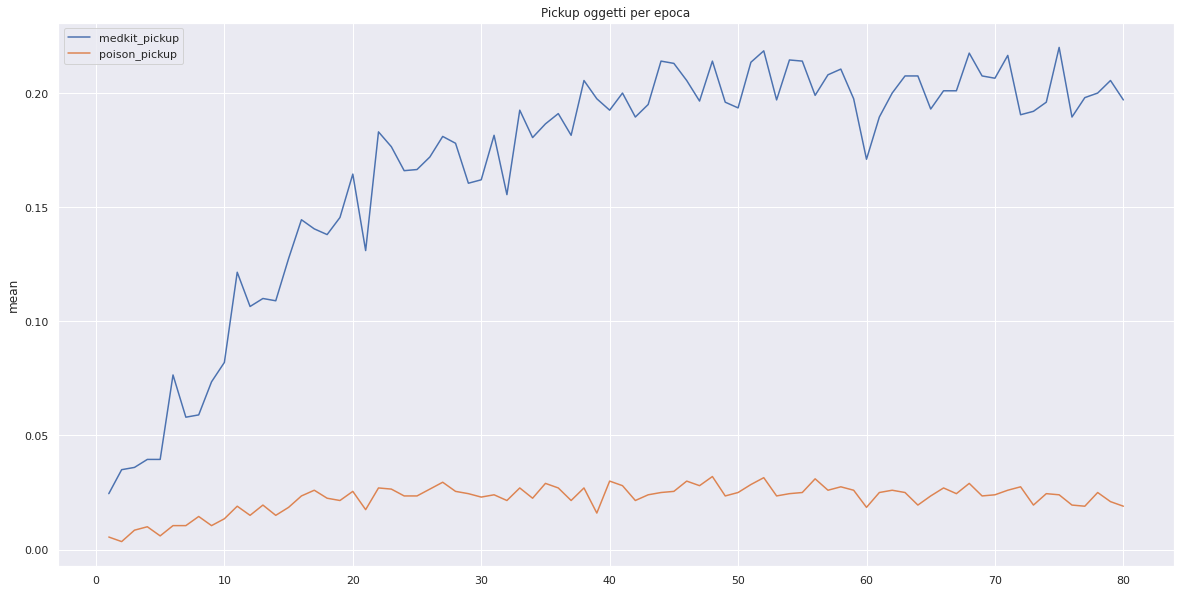

In [13]:
plot = sns.lineplot(data=medkit_pickup, x = range(1,len(reward) + 1), y="mean")
plot = sns.lineplot(data=poison_pickup, x = range(1,len(reward) + 1), y="mean")
plt.legend(labels=["medkit_pickup","poison_pickup"])
plt.title('Pickup oggetti per epoca')
plt.show()

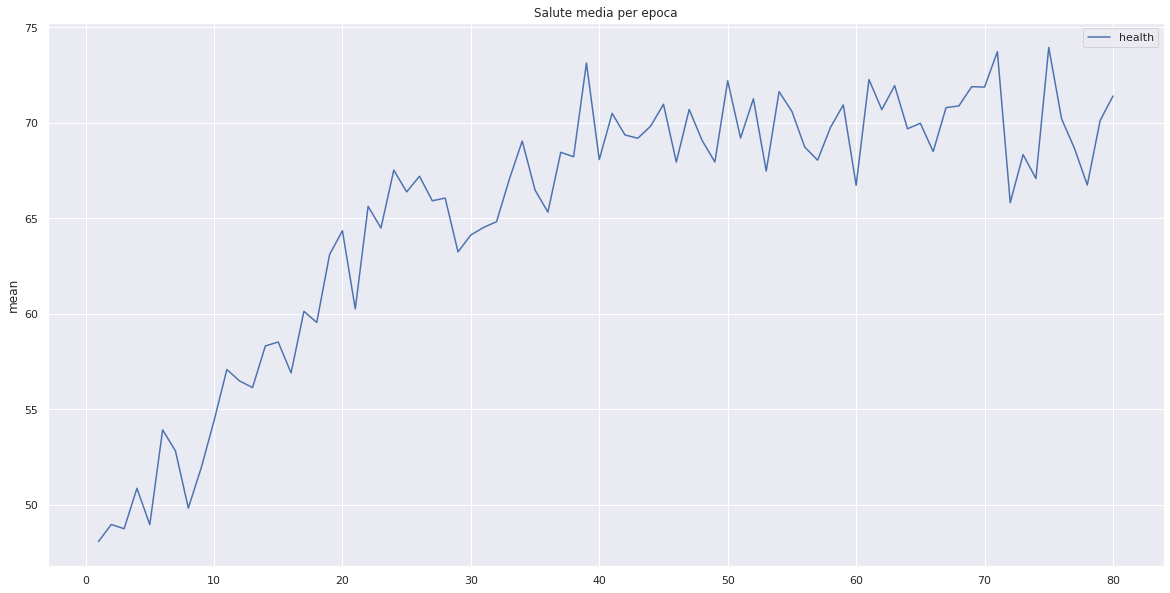

In [14]:
plot = sns.lineplot(data=health, x = range(1,len(reward) + 1), y="mean")
plt.legend(labels=["health"])
plt.title('Salute media per epoca')
plt.show()

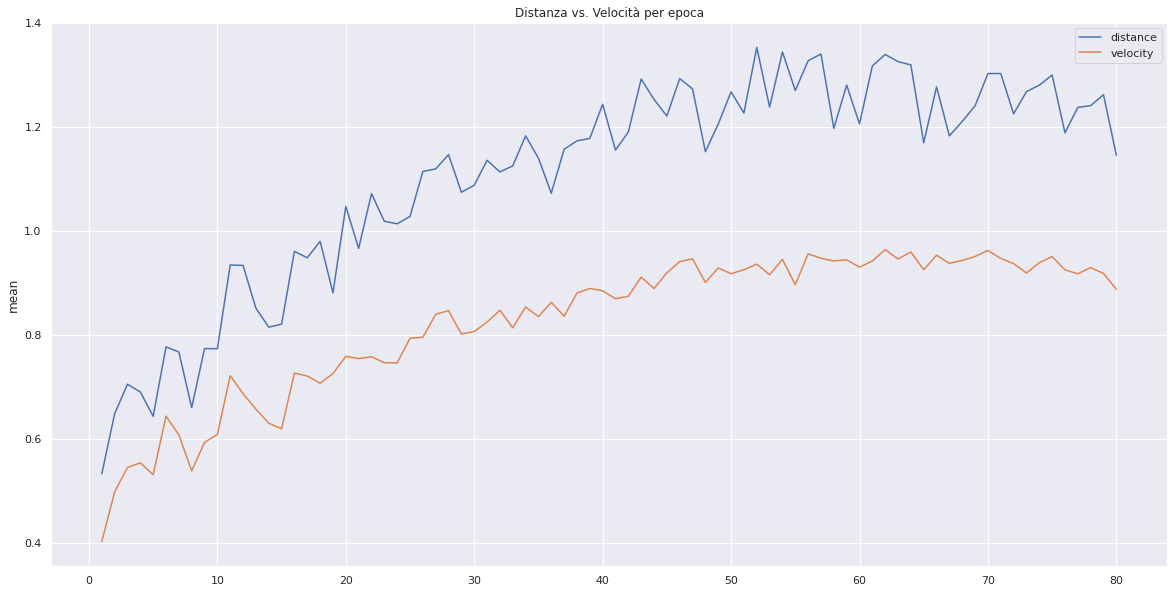

In [15]:
plot = sns.lineplot(data=distance, x = range(1,len(reward) + 1), y="mean")
plot = sns.lineplot(data=velocity, x = range(1,len(reward) + 1), y="mean")
plt.legend(labels=["distance","velocity"])
plt.title('Distanza vs. Velocità per epoca')
plt.show()

## Conclusioni
Il nostro percorso è partito dal primo scenario in cui abbiamo preso familiarità con il nuovo paradigma (RL), le diverse tipologie di architetture e iperparametri, trovandone 
dei valori ottimali che abbiamo potuto riutilizzare negli scenari successivi, avendone compreso l'incidenza ed il significato.
Nel secondo scenario ci siamo concentrati sul reward shaping.
Arrivati al terzo scenario, grazie alle fondamenta maturate nei primi scenari, ci siamo sentiti più sicuri nello sperimentare qualcosa di più complesso e ancor più fuori 
dalle nostre capacità hardware (siamo infatti sicuri che con l'utilizzo di una rete più complessa con anche più worker in parallelo di ottenere risultati eccellenti in tempi relativamente veloci:
basta pensare che ognuno degli ultimi modelli impiegavano più di 6 ore per il training).
Siamo molto soddisfatti dei risultati ottenuti nel primo e secondo scenario, e, nonostante non abbiamo ottenuto un punteggio perfetto nel terzo, siamo estremamente felici
del fatto che l'agente si comporti nel modo sperato(i.e. evita i veleni, raccoglie medikit ed esplora correttamente il labirinto).

## Riferimenti


Arnold :
@inproceedings{chaplot2017arnold,
  title={Arnold: An Autonomous Agent to Play FPS Games.},
  author={Chaplot, Devendra Singh and Lample, Guillaume},
  booktitle={Proceedings of AAAI},
  year={2017},
  Note={Best Demo award}
}


ViZDoom:
@article{wydmuch2018vizdoom,
  title={ViZDoom Competitions: Playing Doom from Pixels},
  author={Wydmuch, Marek and Kempka, Micha{\l} and Ja{\'s}kowski, Wojciech},
  journal={IEEE Transactions on Games},
  year={2018},
  publisher={IEEE}
Rarity of Events:
@article{roe,
title={Automated Curriculum Learning by Rewarding
Temporally Rare Events},
author={Niels Justesen, Sebastian Risi},
year={2018}

Automated Curriculum Learning by Rewarding Temporally Rare Events | Niels Justesen & Sebastian Risi | [link](https://arxiv.org/pdf/1803.07131.pdf)

Human-level control through deep reinforcement
learning | DeepMind | 26 february 2015 | vol 518 | Nature | [link](https://www.nature.com/articles/nature14236)
